# Classification Techniques
## Logistic Regression
1. Logistic regression is used in situations where the dependent variable is categorical
    1. If the dependent variable has two categories, then it is called a binary logistic regression
    2. If the dependent variable has more than two categories, then it's called a multi-class logistic regression
2. The goal is to classify new records into one of the categories of the dependent variable
3. Logistic regression also gives the probability of belonging into one of the categories

## Applications of Logistic Regression
1. Classify customers as returning or non-returning (classification)
2. Finding factors that differentiate between returning or non-returning customers (profiling)

## Steps in Binary Logistic Regression
Assume there are two classes: buy/ don't buy, 0/1. Then the first step is:
1. Compute the probability, $p$, of belonging to each class
2. Using a threshold value, determine which class each observation falls in
    1. If the probability is above the threshold, that observation may be classified as "buy", "1"
    2. If the probability is below the threshold, that observation may be classified as "don't buy", "0"

## The Logistic Regression model
1. The logistic equation: $p=\frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_kx_k)}}$
    1. This is called the logit function
2. Logistic regression seeks to find the parameters $\beta_0, \beta_1, ..., \beta_k$

## Import Required Packages

In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Bring in Data

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing
1. The "ID" and "ZIP Code" columns are not relevant for model building and therefore should be removed.
2. If a column name has a space, replace the space with an underscore (_)
3. Change the "Education" variable to be type "category". Rename the values (1,2,3) of Education variable to the following:
    1. 1 = "Undergrad"
    2. 2 = "Graduate"
    3. 3 = "Advanced/Professional"
4. Turn the renamed variable to be a dummy variable

In [3]:
# Delete the ID and ZIP code columns
bank_dfv2 = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace space with underscore in column names
bank_dfv2.columns = bank_dfv2.columns.str.replace(' ', '_')

# Change "Education" column as categorical
bank_dfv2['Education'] = bank_dfv2['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Advanced/ Professional"
new_categories = {1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'}
bank_dfv2.Education.cat.rename_categories(new_categories, inplace=True)

# Create dummy variables for the categorical data
bank_dfv3 = pd.get_dummies(bank_dfv2, prefix_sep='_', drop_first=True)

## Data Preprocessing
1. Identify dependent and independent variables
2. Split data into training and testing data
    1. 60% training and 40% testing

In [4]:
# Identify dependent and independent variables
y = bank_dfv3['Personal_Loan']
X = bank_dfv3.drop(columns=['Personal_Loan'])

# Partition data into training (60%) and testing (40%)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Use logistic regression to model "Personal_Loan"
1. Fit the logistic regression on the training data
2. Print the intercept and model coefficients
3. Get the class predictions and probabilities of the training data

In [5]:
# fit a logistic regression
logit_reg = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

# Get the intercept and coefficients of the logistic regression
logit_reg_intercept = logit_reg.intercept_[0]
logit_reg_coeff = logit_reg.coef_[0]

# Get the class predictions of the model, along with its probabilities 
train_pred_class = logit_reg.predict(train_X)
train_pred_prob = logit_reg.predict_proba(train_X)

# Print intercept and model coefficients
# print('Logistic regression intercept: ', logit_reg_intercept)
# print("Logistic regression variables and their coefficients:")
# pd.DataFrame({'coeff': logit_reg_coeff}, index=train_X.columns) #DataFrame of variables and coeff

## Compare predicted class labels and actual class labels

In [6]:
# comp_df = pd.DataFrame({'Actual_Class': train_y, 'Predicted_Class': logit_reg_pred})

# print(comp_df.Actual_Class.value_counts()/len(comp_df))
# print("\n")
# print(comp_df.Predicted_Class.value_counts()/len(comp_df))

## Use the statsmodel package to model "Personal_Loan"

In [7]:
new_train_X = sm.add_constant(train_X) #Add a column of ones
logistic = sm.Logit(train_y, new_train_X).fit() #Fit the logistic regression
logit_coeff = logistic.params #Get the coefficients

# print(logistic.summary())

Optimization terminated successfully.
         Current function value: 0.113383
         Iterations 9


## Use the logistic regression on unseen data
1. Use the logistic regression to "score" the testing data
2. Obtain probabilities for the testing data

In [56]:
# Get the class predictions of the testing data

test_pred_class = logit_reg.predict(test_X)
test_pred_prob = logit_reg.predict_proba(test_X)
pred_summary = pd.DataFrame({"Actual Class": test_y, "Predicted Class": test_pred_class,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})
pred_summary.head()

,Actual Class,Predicted Class,P(Y=0),P(Y=1)
2764,0,0,0.976150,0.023850
4767,0,0,0.999937,0.000063
3814,0,0,0.999901,0.000099
3499,0,0,0.998397,0.001603
2735,0,0,0.957402,0.042598


## Model Evaluation
1. Provide the confusion matrix and comment on it

In [9]:
from dmba import classificationSummary

# Confusion matrix for training data
classificationSummary(train_y, train_pred_class)

# Confusion matrix for testing data
classificationSummary(test_y, test_pred_class)

no display found. Using non-interactive Agg backend
Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 2683   30
     1   90  197
Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 1791   16
     1   64  129


## Model Evaluation
1. Provide the model's accuracy rate and comment on it
2. Provide the model's misclassification rate and comment on it

In [10]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_y, train_pred_class)
test_accuracy = accuracy_score(test_y, test_pred_class)

# Get misclassification rate
train_misclass = 1 - train_accuracy
test_misclass = 1 - test_accuracy

print("Accuracy rate for training data:", train_accuracy)
print("Accuracy rate for testing data:", test_accuracy)

print("\nMisclassification rate for training data:", train_misclass)
print("Misclassification rate for testing data:", test_misclass)

Accuracy rate for training data: 0.96
Accuracy rate for testing data: 0.96

Misclassification rate for training data: 0.040000000000000036
Misclassification rate for testing data: 0.040000000000000036


## Model Evaluation
1. Provide the sensitivity (Recall) and comment on it
2. Provide the specificity and comment on it

In [11]:
# Compute sensitivity. Sensitivity is also called true positive rate or recall
# From the confusion tabel: among those that are "0", how many of them are actually "0"

from sklearn.metrics import recall_score

train_recall = recall_score(train_y, train_pred_class)
test_recall = recall_score(test_y, test_pred_class)

print("True positive rate for training data:", train_recall)
print("True positive rate for testing data:", test_recall)

True positive rate for training data: 0.686411149825784
True positive rate for testing data: 0.6683937823834197


## Model Evaluation
1. Provide the ROC curve and comment on it

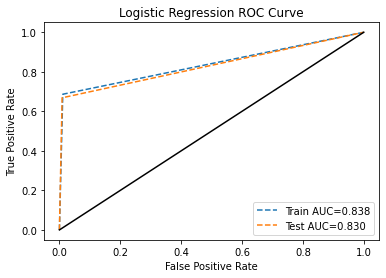

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline
import matplotlib.pylab as plt
# %pylab inline

# Calculate AUC for train and test data
auc_train = roc_auc_score(train_y, train_pred_class)
auc_test = roc_auc_score(test_y, test_pred_class)

# calculate fpr and tpr for train and test data
fpr_train, tpr_train, _ = roc_curve(train_y, train_pred_class)
fpr_test, tpr_test, _ = roc_curve(test_y, test_pred_class)

# Plotting
plt.plot(fpr_train, tpr_train, linestyle='--', label="{}{:.3f}".format("Train AUC=", auc_train))
plt.plot(fpr_test, tpr_test, linestyle='--', label="{}{:.3f}".format("Test AUC=", auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

## Model Evaluation
1. Provide the Gains/ Decile chart and comment on it

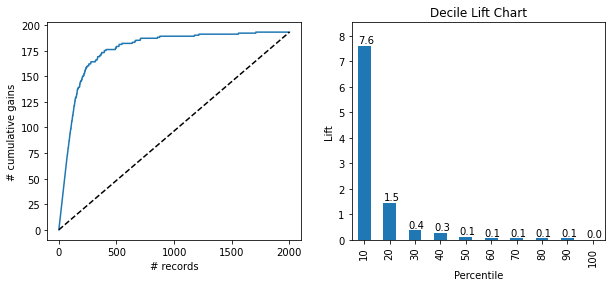

In [70]:
from dmba import gainsChart, liftChart

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": test_pred_class,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()